# To find the leading genre of games that was launched from a dataset contiaining data gathered from 2006 to 2016.  
## To do: 
- Check which genre was developed most frequently by developers (Use Histogram)
- See which platform developed the most frequent genre (Use bar chart)
- Which platform got the highest score for which genre (Find a relationship between genre and platform)


In [27]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import *
sns.set_style('whitegrid')
sns.set(font_scale=1)
%matplotlib inline

In [28]:
#importing a csv file
df = pd.read_csv('ign.csv', header=0, index_col=0)
df.index+=1
df.head(10)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
1,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
3,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
4,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
5,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
6,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
7,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
8,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
9,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11
10,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012,9,11


In [29]:
df.head(50)
sort_by_year = df.sort_values(['release_year','platform','genre'])
type(sort_by_year)

pandas.core.frame.DataFrame

In [30]:
sort_by_year.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
517,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1
589,Okay,Star Wars: Shadows of the Empire,/games/star-wars-shadows-of-the-empire/n64-415,Nintendo 64,6.5,Action,N,1996,12,9
484,Bad,Mortal Kombat Trilogy,/games/mortal-kombat-trilogy/n64-454,Nintendo 64,4.1,Fighting,N,1996,11,20
591,Okay,Killer Instinct Gold,/games/killer-instinct-gold/n64-499,Nintendo 64,6.5,Fighting,N,1996,12,4
489,Great,Pilotwings 64,/games/pilotwings-64/n64-83,Nintendo 64,8.2,Flight,N,1996,9,25


In [31]:
sort_by_year.score = sort_by_year.score.astype(int)
sort_by_year.tail(10)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
18572,Amazing,Overwatch,/games/overwatch/xbox-one-20045579,Xbox One,9,Shooter,Y,2016,5,28
18603,Good,Hitman: Episode 4,/games/hitman-episode-4/xbox-one-20051639,Xbox One,7,Shooter,N,2016,8,19
18612,Mediocre,Tom Clancy's The Division -- Underground,/games/tom-clancys-the-division-underground/xb...,Xbox One,5,Shooter,N,2016,7,6
18598,Bad,7 Days to Die,/games/7-days-to-die/xbox-one-20051934,Xbox One,4,"Shooter, Adventure",N,2016,7,13
18387,Great,Rocket League,/games/rocket-league/xbox-one-20046670,Xbox One,8,Sports,N,2016,2,23
18453,Great,FIFA 17,/games/fifa-2017/xbox-one-20052734,Xbox One,8,Sports,N,2016,9,22
18465,Amazing,Pro Evolution Soccer 2017,/games/pro-evolution-soccer-2017/xbox-one-2005...,Xbox One,9,Sports,Y,2016,9,13
18469,Great,NHL 17,/games/nhl-17/xbox-one-20052732,Xbox One,8,Sports,N,2016,9,12
18608,Good,Pokemon Go,/games/pokemon-go/iphone-20042699,iPhone,7,Battle,N,2016,7,13
18420,Mediocre,Rick and Morty: Pocket Mortys,/games/rick-and-morty-pocket-mortys/iphone-200...,iPhone,5,RPG,N,2016,1,12


In [32]:
genre_score_year = sort_by_year[['genre','score','release_year']]
genre_score_year = pd.DataFrame(genre_score_year)
genre_score_year.head()

,genre,score,release_year
517,Adventure,8,1970
589,Action,6,1996
484,Fighting,4,1996
591,Fighting,6,1996
489,Flight,8,1996


In [33]:
sort_by_year.drop('editors_choice',axis=1,inplace=True)

In [34]:
sort_by_year.drop(sort_by_year.index[0],inplace=True)
sort_by_year.reset_index(drop = True).tail(10)


,score_phrase,title,url,platform,score,genre,release_year,release_month,release_day
18614,Amazing,Overwatch,/games/overwatch/xbox-one-20045579,Xbox One,9,Shooter,2016,5,28
18615,Good,Hitman: Episode 4,/games/hitman-episode-4/xbox-one-20051639,Xbox One,7,Shooter,2016,8,19
18616,Mediocre,Tom Clancy's The Division -- Underground,/games/tom-clancys-the-division-underground/xb...,Xbox One,5,Shooter,2016,7,6
18617,Bad,7 Days to Die,/games/7-days-to-die/xbox-one-20051934,Xbox One,4,"Shooter, Adventure",2016,7,13
18618,Great,Rocket League,/games/rocket-league/xbox-one-20046670,Xbox One,8,Sports,2016,2,23
18619,Great,FIFA 17,/games/fifa-2017/xbox-one-20052734,Xbox One,8,Sports,2016,9,22
18620,Amazing,Pro Evolution Soccer 2017,/games/pro-evolution-soccer-2017/xbox-one-2005...,Xbox One,9,Sports,2016,9,13
18621,Great,NHL 17,/games/nhl-17/xbox-one-20052732,Xbox One,8,Sports,2016,9,12
18622,Good,Pokemon Go,/games/pokemon-go/iphone-20042699,iPhone,7,Battle,2016,7,13
18623,Mediocre,Rick and Morty: Pocket Mortys,/games/rick-and-morty-pocket-mortys/iphone-200...,iPhone,5,RPG,2016,1,12


In [35]:
sort_by_year.drop(sort_by_year.index[0],axis=0,inplace=True)

In [36]:
sort_by_year.isnull().any()
sort_by_year.describe()


,score,release_year,release_month,release_day
count,18623.000000,18623.000000,18623.000000,18623.000000
mean,6.627718,2006.517854,7.138538,15.605005
std,1.702342,4.579316,3.476424,8.689801
min,0.000000,1996.000000,1.000000,1.000000
25%,6.000000,2003.000000,4.000000,8.000000
50%,7.000000,2007.000000,8.000000,16.000000
75%,8.000000,2010.000000,10.000000,23.000000
max,10.000000,2016.000000,12.000000,31.000000


In [37]:
sort_by_year.dropna(inplace=True)
sort_by_year.describe()

,score,release_year,release_month,release_day
count,18587.000000,18587.000000,18587.000000,18587.000000
mean,6.627804,2006.511164,7.139937,15.602572
std,1.702650,4.580464,3.476760,8.692133
min,0.000000,1996.000000,1.000000,1.000000
25%,6.000000,2003.000000,4.000000,8.000000
50%,7.000000,2007.000000,8.000000,16.000000
75%,8.000000,2010.000000,10.000000,23.000000
max,10.000000,2016.000000,12.000000,31.000000


In [38]:
list_genre = sort_by_year['genre'].unique().tolist()

In [39]:
print(len(list_genre))
print(list_genre)

112
['Fighting', 'Flight', 'Platformer', 'Racing', 'Sports', 'Action', 'Action, Adventure', 'Action, Compilation', 'Adventure', 'Compilation', 'Flight, Action', 'Puzzle', 'RPG', 'Racing, Action', 'Shooter', 'Simulation', 'Strategy', 'Wrestling', 'Action, RPG', 'Casino', 'Fighting, Compilation', 'Hunting', 'Music', 'Pinball', 'Puzzle, Action', 'Sports, Action', 'Battle', 'Board', 'Sports, Racing', 'Action, Simulation', 'Flight, Simulation', 'Sports, Simulation', 'Trivia', 'Music, Action', 'Strategy, RPG', 'Fighting, Action', 'Other', 'Party', 'Action, Platformer', 'Puzzle, Adventure', 'Educational, Puzzle', 'Productivity', 'Virtual Pet', 'Racing, Simulation', 'Card, Battle', 'Sports, Editor', 'Music, Editor', 'RPG, Editor', 'Educational, Action', 'Card', 'Card, RPG', 'Fighting, Adventure', 'Wrestling, Simulation', 'RPG, Compilation', 'RPG, Simulation', 'Flight, Racing', 'Sports, Compilation', 'Shooter, Platformer', 'Hunting, Simulation', 'Fighting, RPG', 'Pinball, Compilation', 'Card, C

In [40]:
replace_genre = {'Action':'Action', 'Action, Adventure':'Action', 'Action, Compilation':'Action', 'Action, Platformer':'Action', 'Action, RPG':'RPG',
                 'Action, Simulation':'Simulation', 'Adventure':'Adventure','Battle':'Action', 'Board':'Strategy', 'Card':'Strategy', 'Card, Battle':'Strategy', 
                 'Card, RPG':'RPG', 'Casino':'Other', 'Compilation':'Other', 'Educational, Action':'Other','Educational, Puzzle':'Strategy',
                 'Fighting':'Action', 'Fighting, Action':'Action', 'Fighting, Adventure':'Adventure', 'Fighting, Compilation':'Action', 'Flight':'Adventure',
                 'Flight,Action':'Action', 'Flight, Racing':'Sports', 'Flight, Simulation':'Simulation', 'Hunting':'Sports', 'Music':'Other', 'Music, Action':'Action',
                 'Music, Editor':'Simulation', 'Other':'Other', 'Party':'Other', 'Pinball':'Sports', 'Platformer':'Other', 'Productivity':'Other', 'Puzzle':'Strategy',
                 'Puzzle, Action':'Strategy', 'Puzzle, Adventure':'Strategy', 'RPG':'RPG', 'RPG, Compilation':'RPG', 'RPG, Editor':'RPG', 'RPG, Simulation':'RPG', 'Racing':'Sports',
                 'Racing, Action':'Action', 'Racing, Simulation':'Simulation', 'Shooter':'Sports', 'Simulation':'Simulation', 'Sports':'Sports', 'Sports, Action':'Action',
                 'Sports, Compilation':'Sports', 'Sports, Editor':'Sports', 'Sports, Racing':'Sports', 'Sports, Simulation':'Simulation', 'Strategy':'Strategy', 'Strategy, RPG':'RPG', 
                 'Trivia':'Other', 'Virtual Pet':'Simulation', 'Wrestling':'Sports', 'Wrestling, Simulation':'Simulation', 'Action, Editor':'Action', 'Adult, Card':'Other',
                 'Board, Compilation':'Other', 'Card, Compilation':'Other', 'Compilation, Compilation':'Other', 'Educational':'Other', 'Educational, Productivity':'Other',
                 'Educational, Simulation':'Other', 'Educational, Trivia':'Strategy', 'Fighting, RPG':'RPG', 'Hunting, Action':'Action', 'Hunting, Simulation':'Simulation',
                 'Other, Action':'Action', 'Pinball, Compilation':'Other', 'Platformer, Action':'Action', 'Puzzle, Compilation':'Strategy', 'Racing, Compilation':'Sports',
                 'Racing, Editor':'Sports', 'Racing, Shooter':'Action', 'Shooter, Platformer':'Action', 'Puzzle, Word Game':'Other', 'Adventure, Compilation':'Action',
                 'Educational, Card':'Other', 'Educational, Adventure':'Other', 'Strategy, Compilation':'Strategy', 'Music, Compilation':'Other', 'Fighting, Simulation':'Simulation',
                 'Platformer, Adventure':'Simulation', 'Shooter, RPG':'RPG', 'Other, Adventure':'Other', 'Simulation, Adventure':'Simulation', 'Adventure, Episodic':'Simulation',
                 'Adventure, Adult':'Simulation', 'Adventure, Platformer':'Simulation', 'Action, Puzzle':'Other', 'Sports, Fighting':'Sports', 'Puzzle, RPG':'RPG', 'Music, RPG':'RPG',
                 'Adventure, Adventure':'Action', 'Adventure, RPG':'RPG', 'Productivity, Action':'Action', 'RPG, Action':'RPG', 'Shooter, First-Person':'Action',
                 'Baseball':'Sports', 'Compilation, RPG':'RPG', 'Sports, Baseball':'Sports', 'Sports, Other':'Sports', 'Sports, Party':'Sports', 'Puzzle, Platformer':'Other',
                 'Action, Strategy':'Strategy', 'Music, Adventure':'Other', 'Strategy, Simulation':'Strategy', 'Sports, Golf':'Sports', 'Hardware':'Other', 'Shooter, Adventure':'Action'}                                                                                          

genres = sort_by_year.genre.map(replace_genre)    

In [41]:
df = pd.DataFrame(genres)

In [42]:
df.head()

,genre
484,Action
591,Action
489,Adventure
515,Other
485,Sports


In [43]:
sort_by_year['genre'] = df['genre']

In [44]:
sort_by_year.reset_index(inplace=True)

In [45]:
#deleting the unwanted columns


sort_by_year.drop(['index'], axis=1, inplace=True)
# sort_by_year.drop(['level_0'], axis=1, inplace=True)

In [46]:
sort_by_year.rename(columns={'release_year': 'release'}, inplace=True)
sort_by_year.head()

,score_phrase,title,url,platform,score,genre,release,release_month,release_day
0,Bad,Mortal Kombat Trilogy,/games/mortal-kombat-trilogy/n64-454,Nintendo 64,4,Action,1996,11,20
1,Okay,Killer Instinct Gold,/games/killer-instinct-gold/n64-499,Nintendo 64,6,Action,1996,12,4
2,Great,Pilotwings 64,/games/pilotwings-64/n64-83,Nintendo 64,8,Adventure,1996,9,25
3,Amazing,Super Mario 64,/games/super-mario-64/n64-606,Nintendo 64,9,Other,1996,9,25
4,Amazing,Wave Race 64,/games/wave-race-64/n64-81,Nintendo 64,9,Sports,1996,11,15


In [47]:
grade_colors=['#f03b20',
             '#e34a33', 
             '#fde0dd', 
             '#fa9fb5', 
             '#c51b8a', 
             '#edf8b1', 
             '#7fcdbb', 
             '#2c7fb8', 
             '#a1d99b', 
             '#31a354', 
            ]
sns.set(color_codes = True)
sns.set_style('whitegrid')

Text(0.5,1,'Genre Distribution')

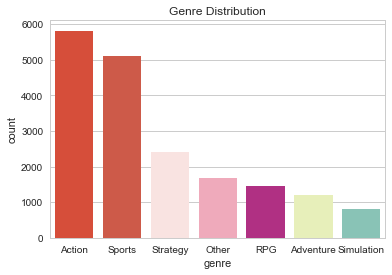

In [48]:
sns.countplot(x = 'genre', data = sort_by_year, order = ['Action','Sports','Strategy','Other','RPG','Adventure','Simulation'] ,palette = grade_colors)
plt.title('Genre Distribution')

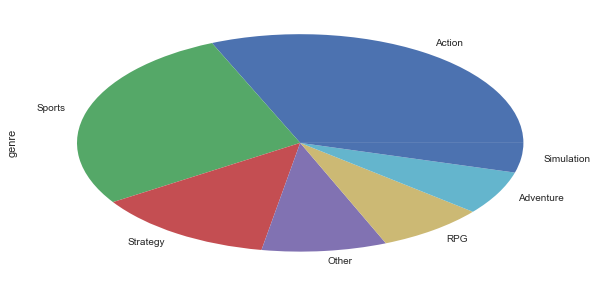

In [49]:
sort_by_year.genre.value_counts().plot(kind='pie', figsize=(10,5))

## Lets find out trends based on genres over the years.
### To find a trend in every genre over 20 years.

## Finding a trend in Action genre from 1996 - 2016

### Trend in Adventure genre

In [130]:
def trend(genre):
    action_g = sort_by_year.loc[sort_by_year['genre'] == genre]
    action_g.reset_index(inplace=True,drop=True)
    action_g.head()
    #group by year
    agb = pd.DataFrame({'count' : action_g.groupby( [ "release", "genre"] ).size()}).reset_index()
    ag = agb['count'].tolist()
    ry = agb['release'].tolist()
    plt.bar(ry,ag)
    plt.title('Trend in {}'.format(genre)) 
    plt.xlabel('Year')
    plt.ylabel("Count")
    return plt.bar(ry,ag,) 

AttributeError: Unknown property bins

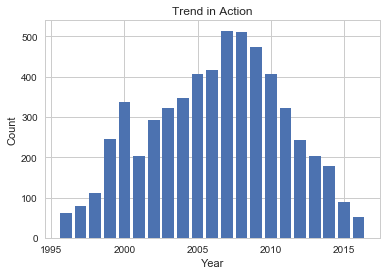

In [131]:
trend('Action')

<Container object of 21 artists>

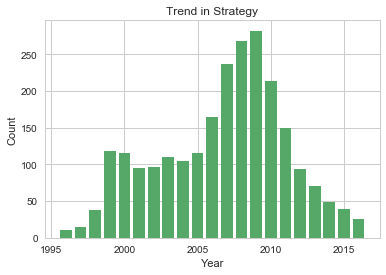

In [126]:
trend('Strategy')

<Container object of 21 artists>

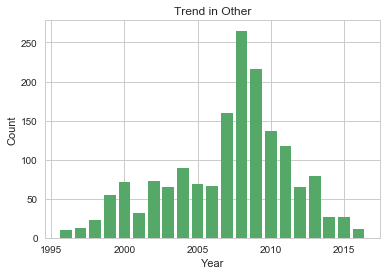

In [127]:
trend('Other')

<Container object of 21 artists>

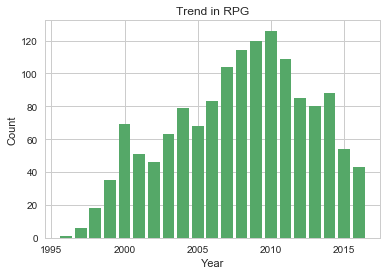

In [128]:
trend('RPG')

<Container object of 21 artists>

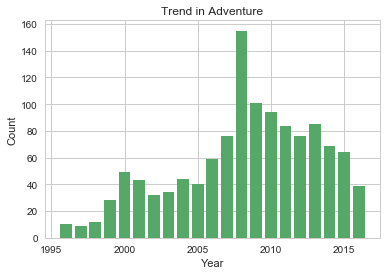

In [129]:
trend('Adventure')